In [1]:
# -*- coding: utf-8 -*-
#import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
#import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos
import seaborn as sns
import cartopy.crs as ccrs

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import geopy
from geopy.distance import geodesic
from collections import Counter
import numpy as np

In [2]:
def dist(point1):
    aa = geodesic((point1.y, point1.x), (51.50021, -0.115958)).km  #
    return aa

In [3]:
year = 2020 
scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{year}/greater-london-{year}-free-selected.shp')
scattergdf['dist'] = scattergdf['geometry'].apply(dist)
#scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid') 
scattergdf

,osm_id,code,fclass,name,class,geometry,dist
0,20849687,2303,cafe,None,2.0,POINT (-0.33392 51.41117),18.101127
1,25475389,2303,cafe,Woburn Cafe,2.0,POINT (-0.12925 51.52658),3.075644
2,25497832,2303,cafe,Cafe Angel,2.0,POINT (-0.11611 51.52476),2.731863
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,POINT (-0.07472 51.55213),6.446541
4,25991205,2303,cafe,Jack's Cafe,2.0,POINT (-0.07248 51.55090),6.396702
...,...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,POINT (-0.06962 51.47342),4.386998
13842,6498189131,2504,mall,Hadson Mall,1.0,POINT (-0.17402 51.52295),4.758809
13843,3753647145,2306,food_court,Ethos,2.0,POINT (-0.13910 51.51634),2.409089
13844,5718576951,2306,food_court,None,2.0,POINT (0.03050 51.53935),11.059186


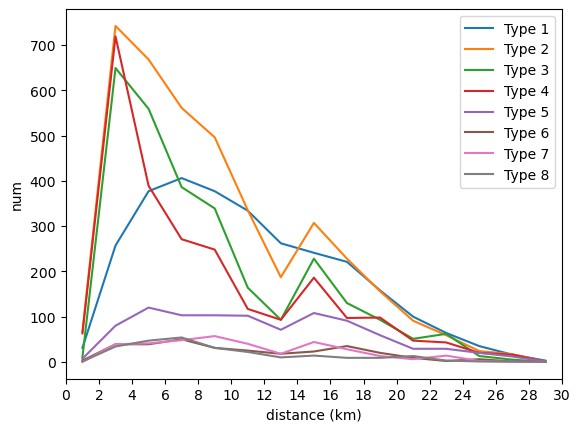

In [4]:
keys = range(1, 30, 2)
scattergdf['dist_part'] = scattergdf['dist'].apply(lambda x: int((x+1) / 2) * 2 + 1)
for i in range(1,9):
    scattergdf_tmp = scattergdf[scattergdf['class'] == i]
    d = Counter(scattergdf_tmp['dist_part'])
    l = []
    for key in keys:
        if key in d:
            l.append(d[key])
        else:
            l.append(0)
    plt.plot(keys, l, label=f'Type {i}')
plt.xlim(0,30)
ticks = range(0,31,2)
plt.xticks(ticks)
plt.legend()
plt.xlabel('distance (km)')
plt.ylabel('num')
#plt.savefig('num.png')
    
path_out = '../result/plot/'
filename = f'{year}_distance'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

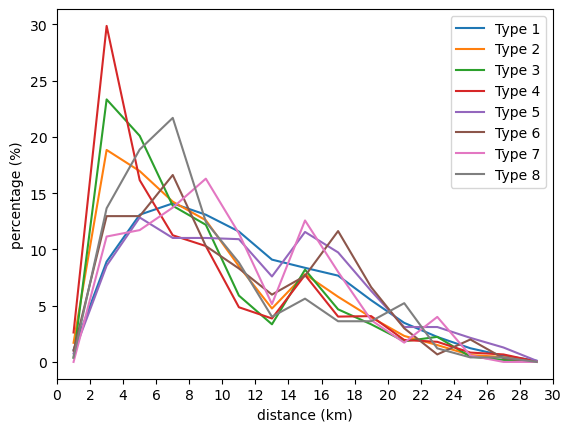

In [5]:
for i in range(1,9):
    scattergdf_tmp = scattergdf[scattergdf['class'] == i]
    d = Counter(scattergdf_tmp['dist_part'])
    l = []
    for key in keys:
        if key in d:
            l.append(d[key])
        else:
            l.append(0)
    plt.plot(keys, np.array(l) / np.sum(l) * 100, label=f'Type {i}')
plt.xlim(0,30)
ticks = range(0,31,2)
plt.xticks(ticks)
plt.legend()
plt.xlabel('distance (km)')
plt.ylabel('percentage (%)')
#plt.savefig('percentage.png')
filename = f'{year}_distance_percent'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')